In [49]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def distance(X1: tuple, X2: tuple) -> float:
    """Calculates the distance between points X1 and X2 on euclidean space.
    
       Sizes of X1 and X2 should be equal."""
    
    if not (len(X1) == len(X2)):
        print('Invalid input!')
        return -1
    else:
        counter = 0
        for i in range(len(X1)):
            counter = counter + ((X1[i] - X2[i]) ** 2)
        return counter ** 0.5


def random_walk(start: tuple[float, float], weights: dict, steps = 100000, display = False) -> tuple[float, float]:
    """Function simulates the random walk algorithm.

       Dictionary of weights should contain number of steps in every side {left, right, up, down}.
        
       It is highly recomended to use this function in another function to clearly defined purpose.
       
       If the input data will be wrong, function returns -1."""

    if 'left' not in weights or 'right' not in weights or 'up' not in weights or 'down' not in weights:
        print('Invalid input!')
        return -1
    else:
        # Storage of points
        X = []
        Y = []

        # Actual position
        x = start[0]
        y = start[1]

        # Walk
        for attempt in range(steps):
            horizontal_vertical = random.choice(['left', 'right', 'up', 'down'])
            
            match horizontal_vertical:
                case 'left':
                    x = x - weights['left']
                case 'right':
                    x = x + weights['right']
                case 'up':
                    y = y + weights['up']
                case 'down':
                    y = y - weights['down']

            X.append(x)
            Y.append(y)
        
        # Diagram using matplotlib
        if display:
            plt.plot(X, Y, zorder=1)
            plt.scatter(start[0], start[1], color='orange', label='start', linewidths=5, zorder=2)
            plt.scatter(x, y, color='red', label='end', linewidths=5, zorder=2)
            plt.legend()
            plt.show()
        
        # Return the actual position
        return (x, y)

In [51]:
start_point = (15, 48)

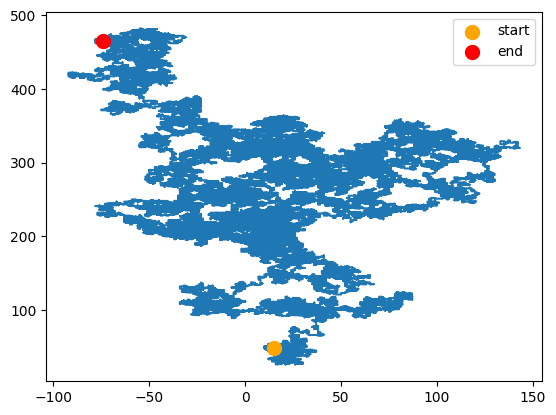

Distance between point (15, 48) to the walker: 426.3918


In [52]:
result = random_walk(
    start = start_point,
    weights = {
        'left': 1,
        'right': 1,
        'up': 1,
        'down': 1
    },
    display = True
)

print(f'Distance between point {start_point} to the walker:', np.round(distance(start_point, result), 4))

In [53]:
def drunkard_s_walk(start: tuple[float, float], steps = 100000, display = False):
    return random_walk(
        start = start,
        weights = {
            'left': 1,
            'right': 1,
            'up': 1,
            'down': 1
        },
        steps = steps,
        display = display
    )


def masochist_s_walk(start: tuple[float, float], steps = 100000, display = False):
    return random_walk(
        start = start,
        weights = {
            'left': 1,
            'right': 1,
            'up': 1.1,
            'down': 1
        },
        steps = steps,
        display = display
    )

In [54]:
start_point = (0, 0)

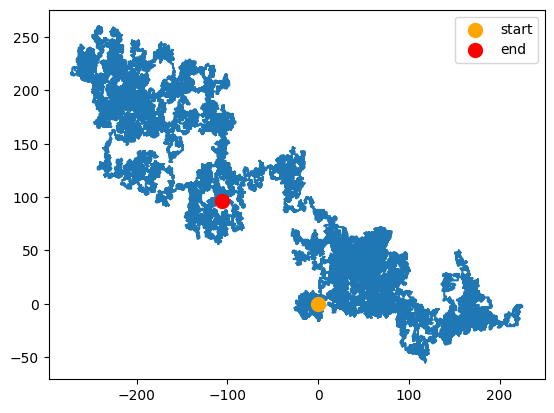

Distance between point (0, 0) to the walker: 143.0105


In [55]:
result = drunkard_s_walk(start_point, display = True)

print(f'Distance between point {start_point} to the walker:', np.round(distance(start_point, result), 4))

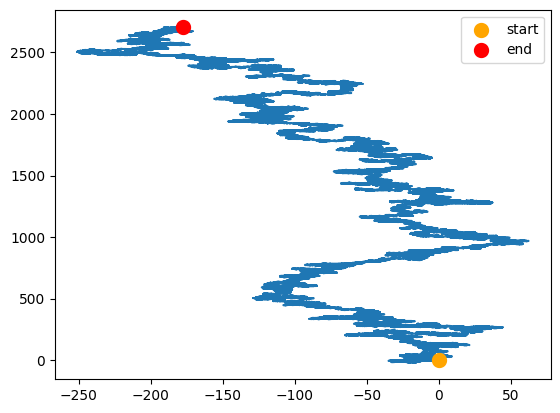

Distance between point (0, 0) to the walker: 2708.0563


In [56]:
result = masochist_s_walk(start_point, display = True)

print(f'Distance between point {start_point} to the walker:', np.round(distance(start_point, result), 4))